In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

from pystac_client import Client
import planetary_computer

import odc.stac
from IPython.display import Image

<Axes: >

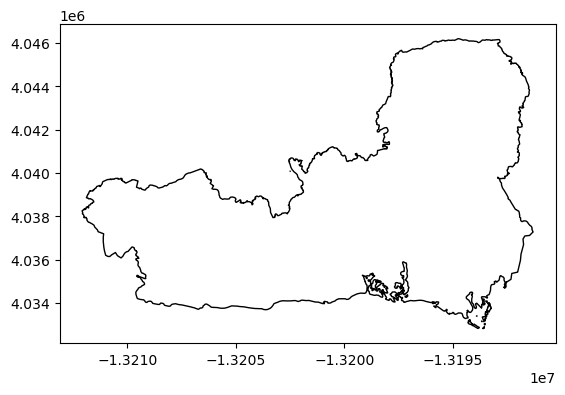

In [19]:
palisades = gpd.read_file(os.path.join('data', 'Palisades_Perimeter_20250121', 'Palisades_Perimeter_20250121.shp'))
palisades.plot(color='None')

<Axes: >

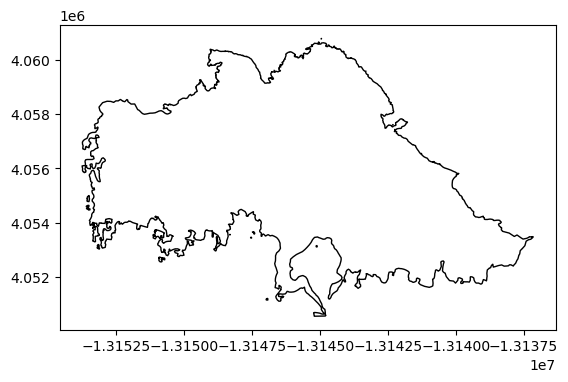

In [17]:
eaton = gpd.read_file(os.path.join('data', 'Eaton_Perimeter_20250121', 'Eaton_Perimeter_20250121.shp'))
eaton.plot(color='None')

In [20]:
palisades

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1.182082e+03,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2.222488e+03,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,2.101172e+01,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,2.149922e+02,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,4.420345e+04,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."
5,6,Heat Perimeter,3.734375e+01,25.061294,"POLYGON ((-13193904.616 4033404.984, -13193901..."
6,7,Heat Perimeter,1.183555e+02,46.890360,"POLYGON ((-13193893.019 4033415.709, -13193889..."
7,8,Heat Perimeter,1.686719e+01,16.860287,"POLYGON ((-13193383.225 4033823.427, -13193385..."
8,9,Heat Perimeter,1.766301e+03,264.850402,"POLYGON ((-13195772.046 4033792.029, -13195780..."
9,10,Heat Perimeter,7.939795e+04,2620.515743,"POLYGON ((-13193305.036 4033646.585, -13193309..."


In [22]:
eaton

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2.206266e+03,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,2.071021e+04,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3.639238e+03,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1.464551e+03,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4.132754e+03,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."
5,6,Heat Perimeter,8.345547e+02,107.859955,"POLYGON ((-13147517.359 4053437.387, -13147524..."
6,7,Heat Perimeter,2.881172e+02,70.041598,"POLYGON ((-13148298.311 4053574.481, -13148298..."
7,8,Heat Perimeter,2.879512e+03,275.409855,"POLYGON ((-13147475.154 4053666.513, -13147472..."
8,9,Heat Perimeter,8.388641e+04,1880.918469,"POLYGON ((-13151028.496 4053701.359, -13151024..."
9,10,Heat Perimeter,6.839698e+04,1518.792972,"POLYGON ((-13153173.289 4053740.672, -13153173..."


In [23]:
print(eaton.crs)
print(palisades.crs)

EPSG:3857
EPSG:3857


In [24]:
fire_bbox = palisades.to_crs('epsg:4326').total_bounds.tolist()  # [minx, miny, maxx, maxy]
print(fire_bbox)

[-118.68616028345444, 34.029938999912595, -118.49943999984302, 34.129359000207145]


In [ ]:
# us = gpd.read_file('cb_2021_us_nation_5m.shp')
# us 

,AFFGEOID,GEOID,NAME,geometry
0,0100000US,US,United States,"MULTIPOLYGON (((179.48246 51.98283, 179.48657 ..."


In [6]:
# GET ITEM
# https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2#Example-Notebook

# access catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# Temporal range of interest
time_range = "2025-02-02/2025-02-27"

search = catalog.search(
    collections=["landsat-c2-l2"],
    bbox=fire_bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 10}},
)

items = search.item_collection()
print(f"Returned {len(items)} Items")


Returned 4 Items


In [7]:
item = items[0]
Image(url=item.assets["rendered_preview"].href, width=500)

In [22]:
item = items[1]
Image(url=item.assets["rendered_preview"].href, width=500)

In [23]:
item = items[2]
Image(url=item.assets["rendered_preview"].href, width=500)

In [8]:
item = items[3]
Image(url=item.assets["rendered_preview"].href, width=500)

In [ ]:
# # PRINT ASSETS
# max_key_length = len(max(item.assets, key=len))
# for key in item.assets.keys():
#     print(f"{key.rjust(max_key_length)} -- {item.assets[key].title}")

              qa -- Surface Temperature Quality Assessment Band
             ang -- Angle Coefficients File
             red -- Red Band
            blue -- Blue Band
            drad -- Downwelled Radiance Band
            emis -- Emissivity Band
            emsd -- Emissivity Standard Deviation Band
            trad -- Thermal Radiance Band
            urad -- Upwelled Radiance Band
           atran -- Atmospheric Transmittance Band
           cdist -- Cloud Distance Band
           green -- Green Band
           nir08 -- Near Infrared Band 0.8
          lwir11 -- Surface Temperature Band
          swir16 -- Short-wave Infrared Band 1.6
          swir22 -- Short-wave Infrared Band 2.2
         coastal -- Coastal/Aerosol Band
         mtl.txt -- Product Metadata File (txt)
         mtl.xml -- Product Metadata File (xml)
        mtl.json -- Product Metadata File (json)
        qa_pixel -- Pixel Quality Assessment Band
       qa_radsat -- Radiometric Saturation and Terrain Occlusion Qua

In [9]:
# bands 7, 5, and 4
# https://www.usgs.gov/media/images/common-landsat-band-combinations
# https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites
bands_of_interest = ['red','green','blue','nir08','swir22']
raw_data = odc.stac.stac_load(
    [item], bands=bands_of_interest
).isel(time=0)
raw_data

<xarray.Dataset> Size: 611MB
Dimensions:      (y: 7871, x: 7761)
Coordinates:
  * y            (y) float64 63kB 3.948e+06 3.948e+06 ... 3.712e+06 3.712e+06
  * x            (x) float64 62kB 2.595e+05 2.595e+05 ... 4.923e+05 4.923e+05
    spatial_ref  int32 4B 32611
    time         datetime64[ns] 8B 2025-02-15T18:28:31.496552
Data variables:
    red          (y, x) uint16 122MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    green        (y, x) uint16 122MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    blue         (y, x) uint16 122MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nir08        (y, x) uint16 122MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    swir22       (y, x) uint16 122MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

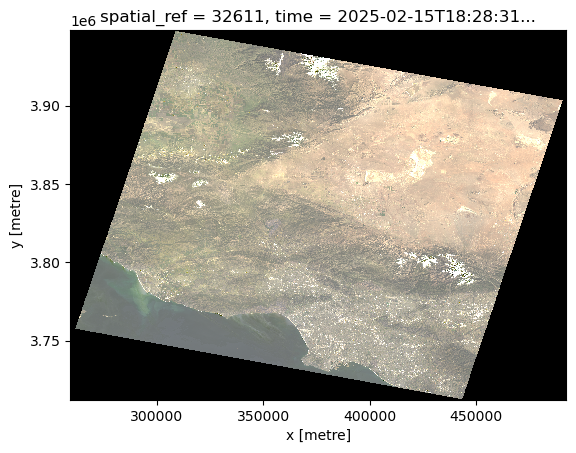

In [27]:
raw_data[['red','green','blue']].to_array().plot.imshow(robust=True)

<Axes: title={'center': 'spatial_ref = 32611, time = 2025-02-15T18:28:31...'}, xlabel='x [metre]', ylabel='y [metre]'>

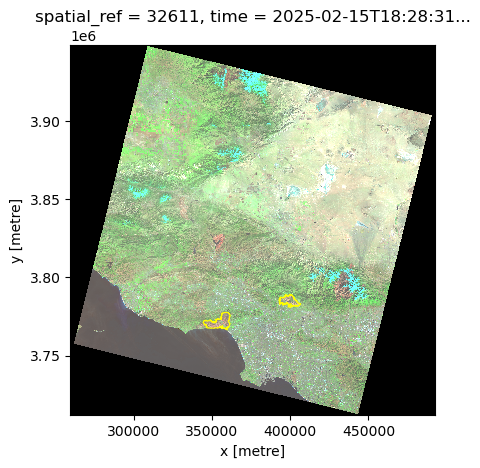

In [26]:
fig, ax = plt.subplots()
raw_data[['swir22','nir08','red']].to_array().plot.imshow(ax=ax, robust=True)

palisades.to_crs(raw_data.rio.crs).plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.8)
eaton.to_crs(raw_data.rio.crs).plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.8)

In [ ]:
# raster_us = raw_data.rio.clip(us.to_crs(raw_data.rio.crs)['geometry'])

In [13]:
raster_us.to_netcdf('landsat8-2018-01-26-sb-simplified.nc')

In [16]:
data = rioxr.open_rasterio('landsat8-2018-01-26-sb-simplified.nc')
data = data.squeeze().drop('band')
data

<xarray.Dataset>
Dimensions:      (x: 7832, y: 6585)
Coordinates:
  * x            (x) float64 1.212e+05 1.212e+05 ... 3.561e+05 3.561e+05
  * y            (y) float64 3.953e+06 3.952e+06 ... 3.755e+06 3.755e+06
    spatial_ref  int64 0
Data variables:
    red          (y, x) uint16 ...
    green        (y, x) uint16 ...
    blue         (y, x) uint16 ...
    nir08        (y, x) uint16 ...
    swir22       (y, x) uint16 ...

In [7]:
for band in bands_of_interest:
    print(item.assets[band].extra_fields['raster:bands'][0], '\n')

# scale, see: 
# https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products
scale = item.assets[band].extra_fields['raster:bands'][0]['scale']

{'scale': 2.75e-05, 'nodata': 0, 'offset': -0.2, 'data_type': 'uint16', 'spatial_resolution': 30} 

{'scale': 2.75e-05, 'nodata': 0, 'offset': -0.2, 'data_type': 'uint16', 'spatial_resolution': 30} 

{'scale': 2.75e-05, 'nodata': 0, 'offset': -0.2, 'data_type': 'uint16', 'spatial_resolution': 30} 



In [10]:
data = xr.Dataset()

In [15]:
for band in bands_of_interest:
    data[band] = raw_data[band].where(raw_data[band] != 0)
    data[band] = data[band]*scale -0.2

In [16]:
data['red']

<xarray.DataArray 'red' (y: 7962, x: 7832)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y            (y) float64 3.953e+06 3.952e+06 ... 3.714e+06 3.714e+06
  * x            (x) float64 1.212e+05 1.212e+05 ... 3.561e+05 3.561e+05
    spatial_ref  int32 32611
    time         datetime64[ns] 2018-01-26T18:34:27.316123

In [19]:
for band in bands_of_interest:
    print(f"min: {data[band].min().item()}, max: {data[band].max().item()}")

min: -0.007802500000000018, max: 1.5999850000000002
min: -0.1998625, max: 1.4715325000000001
min: -0.1999725, max: 1.4371025000000002


In [48]:
for band in bands_of_interest:
    data[band] = data[band].where((data[band]> 0) & (data[band]<=1))

/srv/conda/envs/notebook/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


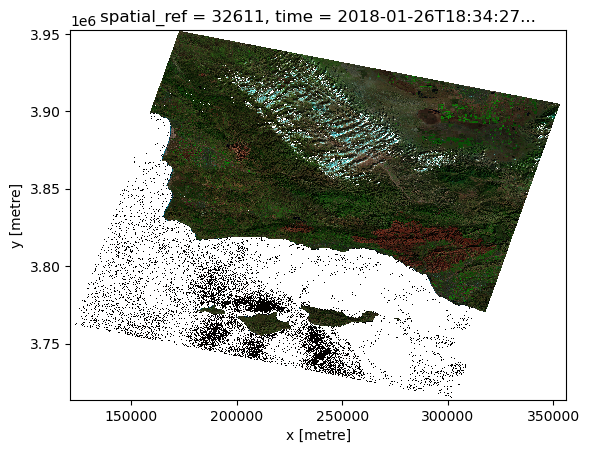

In [49]:
data[bands_of_interest].to_array().plot.imshow()

In [23]:
thomas_fire = thomas_fire.to_crs(data.rio.crs) 

/srv/conda/envs/notebook/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


<Axes: title={'center': 'spatial_ref = 32611, time = 2018-01-26T18:34:27...'}, xlabel='x [metre]', ylabel='y [metre]'>

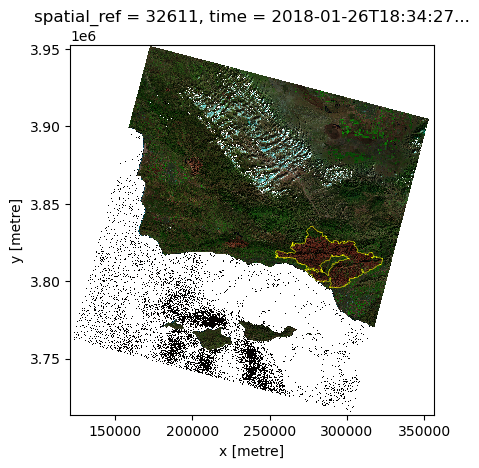

In [25]:
fig, ax = plt.subplots()
data[bands_of_interest].to_array().plot.imshow(ax=ax)

thomas_fire.plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.3)

In [26]:
thomas_fire.bounds

,minx,miny,maxx,maxy
20274,253728.216889,3.795467e+06,323152.253155,3.835517e+06


In [52]:
raster_us = data.rio.clip(us.to_crs(data.rio.crs)['geometry'])


/srv/conda/envs/notebook/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


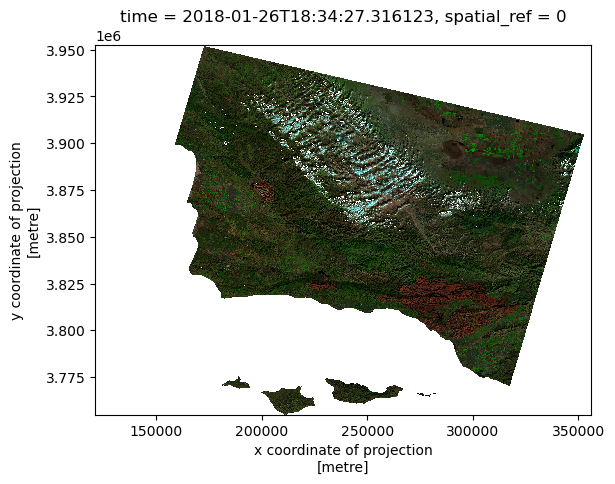

In [53]:
raster_us[bands_of_interest].to_array().plot.imshow()

In [58]:
type(raster_us.red[0,0].item())

float

In [60]:
raster_us = raster_us.fillna(0)

<Axes: title={'center': 'time = 2018-01-26T18:34:27.316123, spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

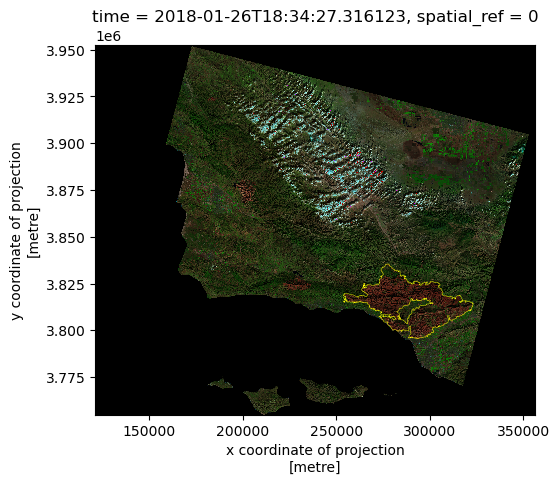

In [62]:
fig, ax = plt.subplots()
raster_us[bands_of_interest].to_array().plot.imshow(ax=ax)

thomas_fire.plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.3)